In [1]:
# Basic packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import classification_report,confusion_matrix
import itertools
import shap

In [3]:
# Import Data and Create DataFrames
all_labs = pd.read_csv('/Users/emmadyer/Desktop/ibd_long_project/data/all_labs_imputed.csv')

# IBD and Healthy Patients
# Healthy-0, IBD-1
ibd_vs_healthy = all_labs.copy()
ibd_vs_healthy['ibd_disease_code'] = ibd_vs_healthy['ibd_disease_code'].replace([2], 1)
ibd_vs_healthy = ibd_vs_healthy.drop('patient_id', axis=1)

# UC and CD Patients
# UC-0, CD-1
uc_vs_cd = all_labs.copy()
ibd_codes = [1,2]
uc_vs_cd = uc_vs_cd[uc_vs_cd['ibd_disease_code'].isin(ibd_codes)]
uc_vs_cd['ibd_disease_code'] = uc_vs_cd['ibd_disease_code'].replace([2], 0)
uc_vs_cd = uc_vs_cd.drop('patient_id', axis=1)

# CD and Healthy Patients
# Healthy-0, CD-1
cd_vs_healthy = all_labs.copy()
cd_healthy_codes = [1,0]
cd_vs_healthy = cd_vs_healthy[cd_vs_healthy['ibd_disease_code'].isin(cd_healthy_codes)]
cd_vs_healthy = cd_vs_healthy.drop('patient_id', axis=1)

# UC and Healthy Patients
# Healthy-0, UC-1
uc_vs_healthy = all_labs.copy()
uc_healthy_codes = [2,0]
uc_vs_healthy = uc_vs_healthy[uc_vs_healthy['ibd_disease_code'].isin(uc_healthy_codes)]
uc_vs_healthy['ibd_disease_code'] = uc_vs_healthy['ibd_disease_code'].replace([2], 1)
uc_vs_healthy = uc_vs_healthy.drop('patient_id', axis=1)

In [9]:
def test_models(df, plot_title, fig_name_path):
    X = df.iloc[:, :-1]
    X = X.fillna(0)
    y = df.loc[:, 'ibd_disease_code']
    X_col_names = list(df.columns.values)
    X_col_names = X_col_names[:-1]
    y_col_name = ['disease_code']

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    names = [
        "Nearest Neighbors",
        "Linear SVM",
        "RBF SVM",
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Neural Net",
        "XGBoost",
        "Naive Bayes",
        "QDA",
    ]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        LogisticRegression(penalty='l2', max_iter=100, C=0.05, n_jobs=-1, random_state=42),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs=-1),
        MLPClassifier(alpha=1, max_iter=1000),
        HistGradientBoostingClassifier(early_stopping=True, max_depth=5),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
    ]
    i = 0
    sns.set_style('darkgrid')
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        ax = plt.gca()
        clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=names[i], alpha=0.8)
        i+=1
        print(i)
    plt.title(plot_title)
    #plt.figure(figsize=(10,6))
    fig = plt.gcf()
    fig.savefig(fig_name_path, dpi=300)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


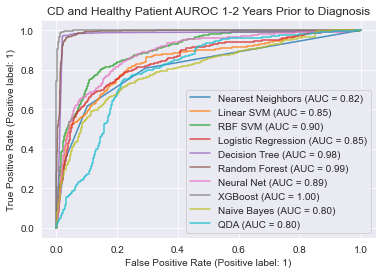

In [10]:
col_names = list(ibd_vs_healthy.columns.values)
remove_years = []

for c in col_names:
    if c[-1] == '3' or c[-1] == '4' or c[-1] == '5':
        remove_years.append(c)

figure_paths = ['/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/healthy_ibd_models_y12.png',
                '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/cd_uc_models_y12.png',
                '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/uc_healthy_models_y12.png',
                '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/cd_healthy_models_y12.png'
]

plot_titles = ['IBD and Healthy Patient AUROC 1-2 Years Prior to Diagnosis',
                'CD and UC Patient AUROC 1-2 Years Prior to Diagnosis',
                'UC and Healthy Patient AUROC 1-2 Years Prior to Diagnosis',
                'CD and Healthy Patient AUROC 1-2 Years Prior to Diagnosis']

dfs = [ibd_vs_healthy, uc_vs_cd, cd_vs_healthy, uc_vs_healthy]
for i, df in enumerate(dfs):
    plt.clf()
    sns.set_style('darkgrid')
    df = df.drop(remove_years, axis=1)
    test_models(df, plot_titles[i], figure_paths[i])
